In [33]:
# Import the dependencies.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [34]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [35]:
# Add the latitudes and longitudes to a list.

coordinates = list(lat_lngs)

In [36]:
# Use the print() function to display the latitude and longitude combinations.

for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

27.62194628990143 -121.53329298843862
28.441775169119722 43.744411204235945
-38.383885556504744 28.948133038682755
-83.70291512551609 -99.6244115196067
-49.622526766210115 -60.414263298581716
44.32410672768049 99.80898719014891
35.00729954046102 -45.05712048501309
74.89567993015086 176.51735985890986
-22.070346960909447 -47.75656507220654
82.09647760340911 51.4382605781457
65.70488120706236 178.4522190716728
-21.384631230698517 -13.36713433727894
-89.13275183736124 -131.50953086627135
-68.78510482386415 57.64953504274192
-38.70999662734772 -119.21893593870294
6.121701627616034 6.78909542456833
64.17359512976432 -175.54326000730703
2.7093087652027634 148.88223364316048
-48.6143380655593 -98.91202403219074
8.384701121936303 171.73012141900352
-89.02109425318811 175.27046728572708
22.884975236161168 135.3703912453193
89.71440598701628 97.36087101416734
-5.103706545417623 -32.54994645344206
74.62705916047622 59.143992720543025
-40.161494163300894 -172.53357626466902
56.1972445685671 113.98

In [37]:
from citipy import citipy

In [38]:
# Create a list for holding the cities.

cities = []

# Identify the nearest city for each latitude and longitude combination.

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    # If the city is unique, then we will add it to the cities list.
    
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.

len(cities)

588

In [39]:
# Import the time library and the datetime module from the datetime library 

import time
from datetime import datetime

In [40]:
# Import the requests library.

import requests

# Import the API key.

from config import weather_api_key

In [41]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b61e5efacc42e3559cf36db1e366e2cd


In [42]:
# Create an empty list to hold the weather data.

city_data = []

# Print the beginning of the logging.

print("Beginning Data Retrieval     ")

print("-----------------------------")

# Create counters.

record_count = 1
set_count = 1

# Loop through all the cities in the list.

for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    
    record_count += 1
    
    # Run an API request for each of the cities.
    
    try:
        # Parse the JSON and retrieve data.
        
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.

    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.

print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | san quintin
Processing Record 2 of Set 1 | buraydah
Processing Record 3 of Set 1 | port alfred
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | rawson
Processing Record 6 of Set 1 | hovd
Processing Record 7 of Set 1 | torbay
Processing Record 8 of Set 1 | leningradskiy
Processing Record 9 of Set 1 | sao carlos
Processing Record 10 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 11 of Set 1 | anadyr
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 15 of Set 1 | onitsha
Processing Record 16 of Set 1 | provideniya
Processing Record 17 of Set 1 | lorengau
Processing Record 18 of Set 1 | castro
Processing Record 19 of Set 1 | butaritari
Processing Record 20 of Set 1 | bluff
Processing Record 21 of Set 1 | naze
Processing Record 22 of 

Processing Record 38 of Set 4 | muros
Processing Record 39 of Set 4 | jalu
Processing Record 40 of Set 4 | nakusp
Processing Record 41 of Set 4 | boden
Processing Record 42 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 43 of Set 4 | nabire
Processing Record 44 of Set 4 | mazeikiai
Processing Record 45 of Set 4 | katherine
Processing Record 46 of Set 4 | haibowan
City not found. Skipping...
Processing Record 47 of Set 4 | cidreira
Processing Record 48 of Set 4 | sarangani
Processing Record 49 of Set 4 | lakatoro
Processing Record 50 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 1 of Set 5 | kajaani
Processing Record 2 of Set 5 | rudiskes
Processing Record 3 of Set 5 | greenwood
Processing Record 4 of Set 5 | skovorodino
Processing Record 5 of Set 5 | louisbourg
City not found. Skipping...
Processing Record 6 of Set 5 | imbituba
Processing Record 7 of Set 5 | tokmak
Processing Record 8 of Set 5 | longyearbyen
Processing Record 9 of Set 5 | y

Processing Record 26 of Set 8 | eldoret
Processing Record 27 of Set 8 | biskamzha
Processing Record 28 of Set 8 | seoul
Processing Record 29 of Set 8 | abonnema
Processing Record 30 of Set 8 | burica
City not found. Skipping...
Processing Record 31 of Set 8 | sahrak
City not found. Skipping...
Processing Record 32 of Set 8 | angoram
Processing Record 33 of Set 8 | shimoda
Processing Record 34 of Set 8 | ugoofaaru
Processing Record 35 of Set 8 | olafsvik
Processing Record 36 of Set 8 | kenai
Processing Record 37 of Set 8 | opuwo
Processing Record 38 of Set 8 | edd
Processing Record 39 of Set 8 | viedma
Processing Record 40 of Set 8 | guatire
Processing Record 41 of Set 8 | coihaique
Processing Record 42 of Set 8 | bambous virieux
Processing Record 43 of Set 8 | wote
Processing Record 44 of Set 8 | emerald
Processing Record 45 of Set 8 | vila velha
Processing Record 46 of Set 8 | diego de almagro
Processing Record 47 of Set 8 | peniche
Processing Record 48 of Set 8 | kigali
Processing Re

Processing Record 12 of Set 12 | quebrada larga
Processing Record 13 of Set 12 | port-cartier
Processing Record 14 of Set 12 | kurayoshi
Processing Record 15 of Set 12 | berdigestyakh
Processing Record 16 of Set 12 | pak phanang
Processing Record 17 of Set 12 | zapolyarnyy
Processing Record 18 of Set 12 | cantaura
Processing Record 19 of Set 12 | bentiu
Processing Record 20 of Set 12 | vilcun
Processing Record 21 of Set 12 | huntsville
Processing Record 22 of Set 12 | lahad datu
Processing Record 23 of Set 12 | palmer
Processing Record 24 of Set 12 | cruzeiro do sul
Processing Record 25 of Set 12 | sabang
Processing Record 26 of Set 12 | yanji
Processing Record 27 of Set 12 | dakar
Processing Record 28 of Set 12 | flinders
Processing Record 29 of Set 12 | saint-joseph
Processing Record 30 of Set 12 | vostok
Processing Record 31 of Set 12 | aasiaat
Processing Record 32 of Set 12 | kazalinsk
City not found. Skipping...
Processing Record 33 of Set 12 | okha
Processing Record 34 of Set 12 

In [ ]:
len(city_data)

In [161]:
# Convert the array of dictionaries to a Pandas DataFrame.

city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,San Quintin,30.4833,-115.9500,71.29,82,3,3.09,MX,2022-08-24 14:32:45
1,Buraydah,26.3260,43.9750,102.65,9,14,9.31,SA,2022-08-24 14:32:45
2,Port Alfred,-33.5906,26.8910,78.19,58,5,1.01,ZA,2022-08-24 14:32:46
3,Punta Arenas,-53.1500,-70.9167,39.22,86,75,15.64,CL,2022-08-24 14:30:14
4,Rawson,-43.3002,-65.1023,53.29,34,0,15.46,AR,2022-08-24 14:32:46
5,Hovd,48.0056,91.6419,58.62,33,8,0.31,MN,2022-08-24 14:32:46
6,Torbay,47.6666,-52.7314,72.75,93,100,16.11,CA,2022-08-24 14:29:43
7,Leningradskiy,69.3833,178.4167,35.62,95,19,9.55,RU,2022-08-24 14:32:47
8,Sao Carlos,-22.0175,-47.8908,77.27,34,30,6.98,BR,2022-08-24 14:32:47
9,Anadyr,64.7500,177.4833,54.10,81,40,8.95,RU,2022-08-24 14:32:47


In [162]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,San Quintin,MX,2022-08-24 14:32:45,30.4833,-115.9500,71.29,82,3,3.09
1,Buraydah,SA,2022-08-24 14:32:45,26.3260,43.9750,102.65,9,14,9.31
2,Port Alfred,ZA,2022-08-24 14:32:46,-33.5906,26.8910,78.19,58,5,1.01
3,Punta Arenas,CL,2022-08-24 14:30:14,-53.1500,-70.9167,39.22,86,75,15.64
4,Rawson,AR,2022-08-24 14:32:46,-43.3002,-65.1023,53.29,34,0,15.46
5,Hovd,MN,2022-08-24 14:32:46,48.0056,91.6419,58.62,33,8,0.31
6,Torbay,CA,2022-08-24 14:29:43,47.6666,-52.7314,72.75,93,100,16.11
7,Leningradskiy,RU,2022-08-24 14:32:47,69.3833,178.4167,35.62,95,19,9.55
8,Sao Carlos,BR,2022-08-24 14:32:47,-22.0175,-47.8908,77.27,34,30,6.98
9,Anadyr,RU,2022-08-24 14:32:47,64.7500,177.4833,54.10,81,40,8.95


In [163]:
# Create the output file (CSV).

output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.

city_data_df.to_csv(output_data_file, index_label="City_ID")

In [164]:
# Extract relevant fields from the DataFrame for plotting.

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

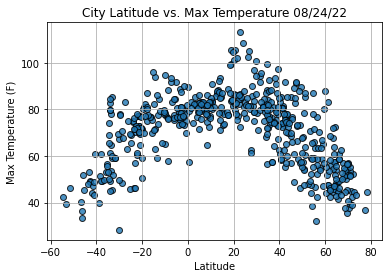

In [165]:
# Import time module

import time

# Build the scatter plot for latitude vs. max temperature.

plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig1.png")

# Show plot.

plt.show()

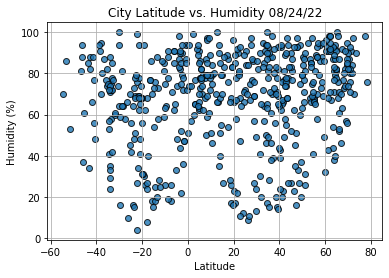

In [166]:
# Build the scatter plots for latitude vs. humidity.

plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig2.png")

# Show plot.

plt.show()

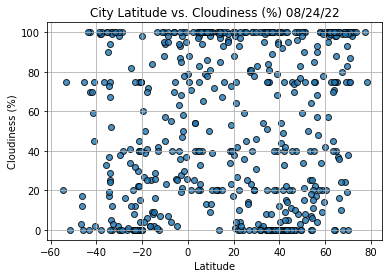

In [167]:
# Build the scatter plots for latitude vs. cloudiness.

plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig3.png")

# Show plot.

plt.show()

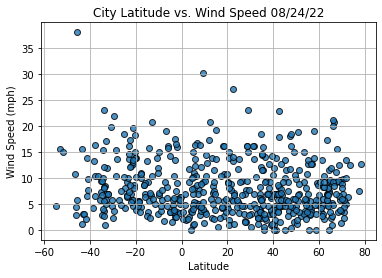

In [168]:
# Build the scatter plots for latitude vs. wind speed.

plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig4.png")

# Show plot.

plt.show()

In [169]:
index13 = city_data_df.loc[13]
index13

City                  Provideniya
Country                        RU
Date          2022-08-24 14:32:49
Lat                       64.3833
Lng                        -173.3
Max Temp                    46.94
Humidity                       92
Cloudiness                     98
Wind Speed                   7.54
Name: 13, dtype: object

In [170]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3      False
4      False
       ...  
531     True
532     True
533     True
534     True
535     True
Name: Lat, Length: 536, dtype: bool

In [171]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,San Quintin,MX,2022-08-24 14:32:45,30.4833,-115.9500,71.29,82,3,3.09
1,Buraydah,SA,2022-08-24 14:32:45,26.3260,43.9750,102.65,9,14,9.31
5,Hovd,MN,2022-08-24 14:32:46,48.0056,91.6419,58.62,33,8,0.31
6,Torbay,CA,2022-08-24 14:29:43,47.6666,-52.7314,72.75,93,100,16.11
7,Leningradskiy,RU,2022-08-24 14:32:47,69.3833,178.4167,35.62,95,19,9.55


In [172]:
# Create Northern and Southern Hemisphere DataFrames.

northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <= 0)]

In [173]:
# Import linear regression from the SciPy stats module.

from scipy.stats import linregress

In [174]:
# Create an equal number of latitudes and temperatures.

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Perform linear regression.

(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Get the equation of the line.

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.55x + 92.64
The p-value is: 0.000


In [175]:
# Calculate the regression line "y values" from the slope and intercept.

regress_values = [(lat * slope + intercept) for lat in x_values]

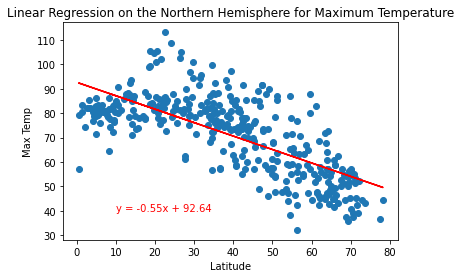

In [176]:
# Create a scatter plot of the x and y values.

plt.scatter(x_values,y_values)

# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.

plt.plot(x_values,regress_values, "r")

# Annotate the text for the line equation and add its coordinates.

plt.annotate(line_eq, (10,40), color="red")
plt.title('Linear Regression on the Northern Hemisphere for Maximum Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

In [177]:
# Create an equal number of latitudes and temperatures.

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Perform linear regression.

(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Get the equation of the line.

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = 0.77x + 85.52
The p-value is: 0.000


In [178]:
# Calculate the regression line "y values" from the slope and intercept.

regress_values = [(lat * slope + intercept) for lat in x_values]

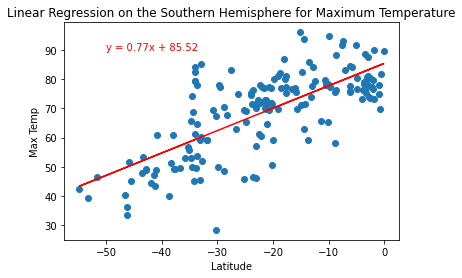

In [179]:
# Create a scatter plot of the x and y values.

plt.scatter(x_values,y_values)

# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.

plt.plot(x_values,regress_values, "r")

# Annotate the text for the line equation and add its coordinates.

plt.annotate(line_eq, (-50,90), color="red")
plt.title('Linear Regression on the Southern Hemisphere for Maximum Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

In [180]:
# Create an equal number of latitudes and temperatures.

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Perform linear regression.

(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Get the equation of the line.

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = 0.11x + 66.3
The p-value is: 0.036


In [181]:
# Calculate the regression line "y values" from the slope and intercept.

regress_values = [(lat * slope + intercept) for lat in x_values]

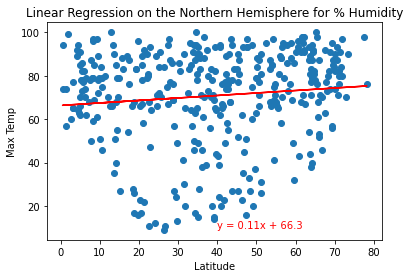

In [182]:
# Create a scatter plot of the x and y values.

plt.scatter(x_values,y_values)

# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.

plt.plot(x_values,regress_values, "r")

# Annotate the text for the line equation and add its coordinates.

plt.annotate(line_eq, (40,10), color="red")
plt.title('Linear Regression on the Northern Hemisphere for % Humidity')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

In [183]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

NameError: name 'plot_linear_regression' is not defined

In [184]:
# Create an equal number of latitudes and temperatures.

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Perform linear regression.

(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Get the equation of the line.

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.09x + 60.66
The p-value is: 0.523


In [185]:
# Calculate the regression line "y values" from the slope and intercept.

regress_values = [(lat * slope + intercept) for lat in x_values]

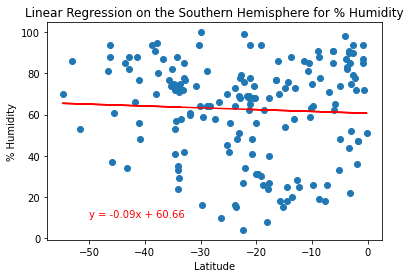

In [186]:
# Create a scatter plot of the x and y values.

plt.scatter(x_values,y_values)

# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.

plt.plot(x_values,regress_values, "r")

# Annotate the text for the line equation and add its coordinates.

plt.annotate(line_eq, (-50,10), color="red")
plt.title('Linear Regression on the Southern Hemisphere for % Humidity')
plt.xlabel('Latitude')
plt.ylabel('% Humidity')
plt.show()

In [187]:
# Create an equal number of latitudes and temperatures.

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Perform linear regression.

(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Get the equation of the line.

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = 0.04x + 56.26
The p-value is: 0.672


In [188]:
# Calculate the regression line "y values" from the slope and intercept.

regress_values = [(lat * slope + intercept) for lat in x_values]

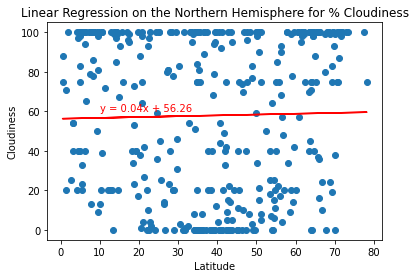

In [189]:
# Create a scatter plot of the x and y values.

plt.scatter(x_values,y_values)

# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.

plt.plot(x_values,regress_values, "r")

# Annotate the text for the line equation and add its coordinates.

plt.annotate(line_eq, (10,60), color="red")
plt.title('Linear Regression on the Northern Hemisphere for % Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

In [190]:
# Create an equal number of latitudes and temperatures.

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Perform linear regression.

(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Get the equation of the line.

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = 0.29x + 51.99
The p-value is: 0.171


In [191]:
# Calculate the regression line "y values" from the slope and intercept.

regress_values = [(lat * slope + intercept) for lat in x_values]

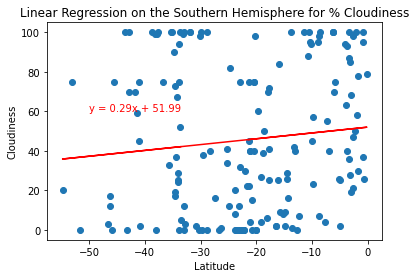

In [192]:
# Create a scatter plot of the x and y values.

plt.scatter(x_values,y_values)

# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.

plt.plot(x_values,regress_values, "r")

# Annotate the text for the line equation and add its coordinates.

plt.annotate(line_eq, (-50,60), color="red")
plt.title('Linear Regression on the Southern Hemisphere for % Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

In [193]:
# Create an equal number of latitudes and temperatures.

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Perform linear regression.

(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Get the equation of the line.

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.01x + 7.66
The p-value is: 0.615


In [194]:
# Calculate the regression line "y values" from the slope and intercept.

regress_values = [(lat * slope + intercept) for lat in x_values]

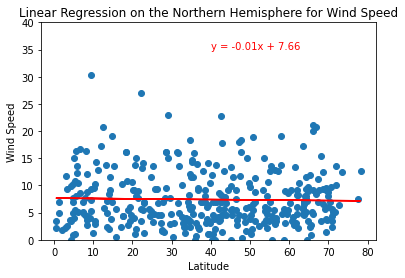

In [195]:
# Create a scatter plot of the x and y values.

plt.scatter(x_values,y_values)

# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.

plt.plot(x_values,regress_values, "r")

# Annotate the text for the line equation and add its coordinates.

plt.annotate(line_eq, (40,35), color="red")
plt.title('Linear Regression on the Northern Hemisphere for Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.ylim(0, 40)
plt.show()

In [196]:
# Create an equal number of latitudes and temperatures.

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Perform linear regression.

(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Get the equation of the line.

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.05x + 7.8
The p-value is: 0.136


In [197]:
# Calculate the regression line "y values" from the slope and intercept.

regress_values = [(lat * slope + intercept) for lat in x_values]

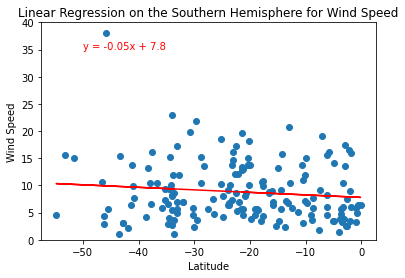

In [199]:
# Create a scatter plot of the x and y values.

plt.scatter(x_values,y_values)

# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.

plt.plot(x_values,regress_values, "r")

# Annotate the text for the line equation and add its coordinates.

plt.annotate(line_eq, (-50,35), color="red")
plt.title('Linear Regression on the Southern Hemisphere for Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.ylim(0, 40)
plt.show()